In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc.set_figure_params(figsize=(4,4),  dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False

In [3]:
adata = sc.read("/mnt/e/Archive/Joe/processed_data/M_cell/h5ad_files/combined_WT_fezf2_KO_all_genes.h5ad")

# Obs plots

/opt/conda/envs/single-cell-analysis/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


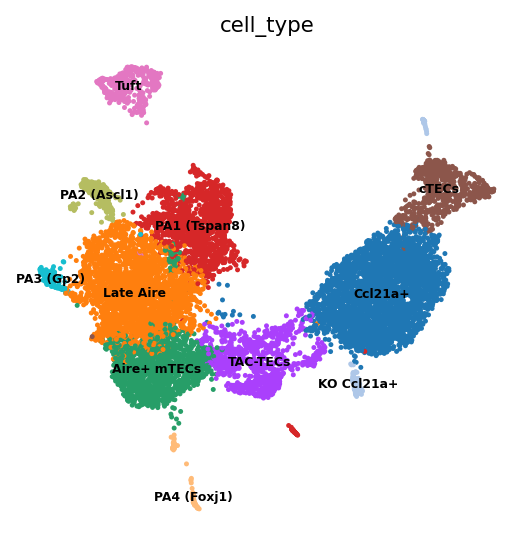

In [14]:
sc.settings.figdir = "/mnt/f/M-cells/analysis/Paper figs/Fig 3 (Fezf2 KO)/"
sc.pl.umap(
    adata,
    color="cell_type",
    s=20,
    legend_loc="on data",
    legend_fontsize="xx-small",
    save="_3A_cell_types.pdf"
)

/opt/conda/envs/single-cell-analysis/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


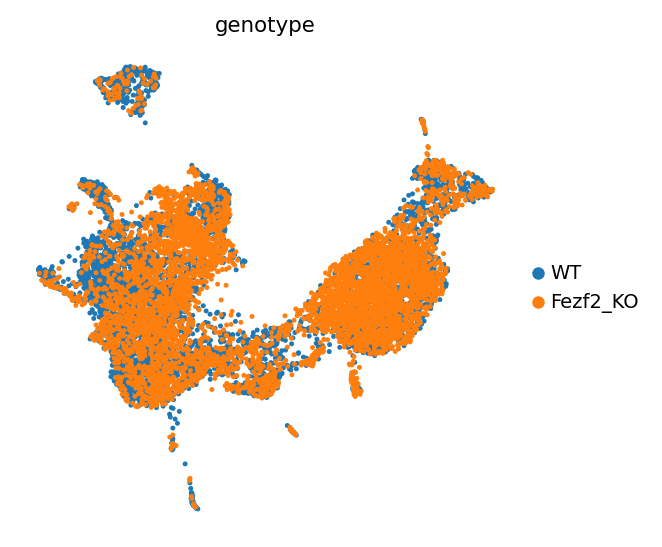

In [15]:
sc.pl.umap(
    adata,
    color="genotype",
    s=20,
)

# Feature plots

In [7]:
geneList=["Osm"]
vmin=[]
vmax=[]
for gene in geneList:
    vmin.append(np.quantile(adata[adata.obs.genotype=="WT", gene].layers["scVI_normalized"], 0.01))
    vmax.append(np.quantile(adata[adata.obs.genotype=="WT", gene].layers["scVI_normalized"], 0.99))

## WT

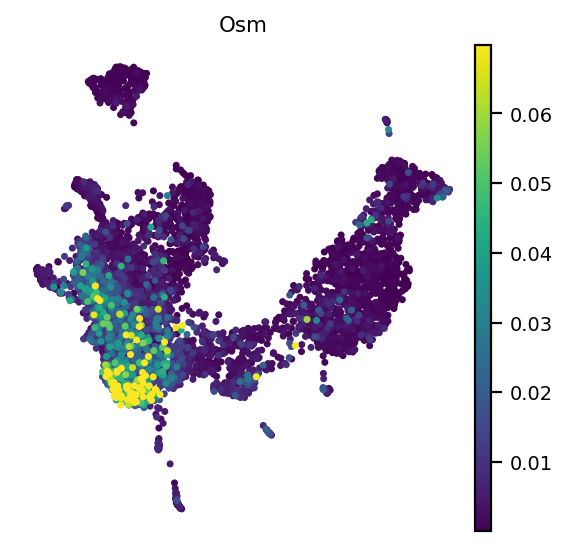

In [8]:
sc.pl.umap(
    adata[adata.obs.genotype == "WT"],
    color=geneList,
    s=40,
    cmap="viridis",
    vmin=vmin,
    vmax=vmax,
    layer="scVI_normalized",
    ncols=4,
)

## KO

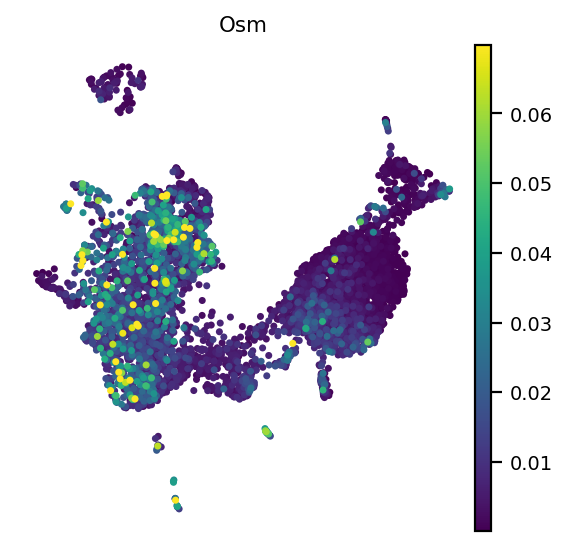

In [9]:
sc.pl.umap(
    adata[adata.obs.genotype == "Fezf2_KO"],
    color=geneList,
    s=40,
    cmap="viridis",
    vmin=vmin,
    vmax=vmax,
    layer="scVI_normalized",
    ncols=4,
)